In [37]:
import pandas as pd

df = pd.read_csv(r"D:\ecommerce-analytics\data\raw_orders.csv")
df.head()



,order_id,product,quantity,price,date,customer_id
0,1001,Shoes,1,1200,1-5-25,501
1,1002,T-shirt,2,500,1-6-25,502
2,1003,Headphones,1,1500,1-7-25,503
3,1004,Watch,1,2000,1-8-25,504
4,1005,Bag,3,800,1-9-25,505


In [38]:
# Convert date column into proper date format
df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")

# Check for missing values
df.isnull().sum()


C:\Users\SHIVA\AppData\Local\Temp\ipykernel_19124\140838152.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], dayfirst=True, errors="coerce")


order_id       0
product        0
quantity       0
price          0
date           0
customer_id    0
dtype: int64

In [39]:
df["revenue"] = df["quantity"] * df["price"]
total_revenue = df["revenue"].sum()
total_revenue
top_product = df.groupby("product")["quantity"].sum().sort_values(ascending=False)
top_product
total_customers = df["customer_id"].nunique()
total_customers


5

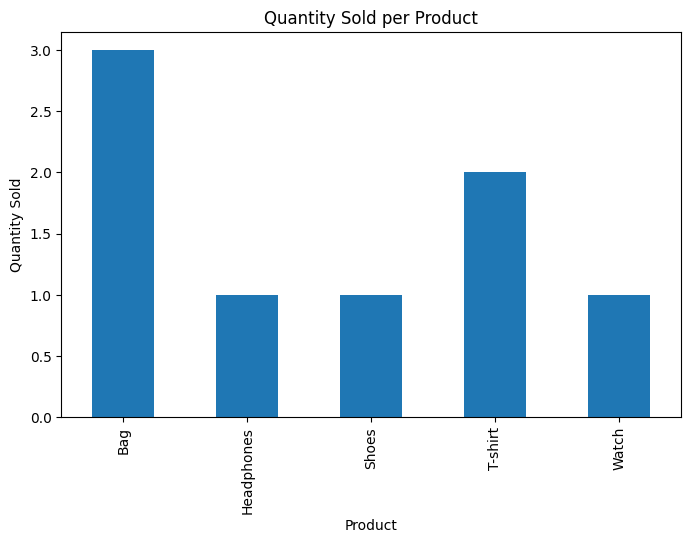

In [40]:
import matplotlib.pyplot as plt

product_sales = df.groupby("product")["quantity"].sum()

plt.figure(figsize=(8,5))
product_sales.plot(kind="bar")
plt.title("Quantity Sold per Product")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.show()


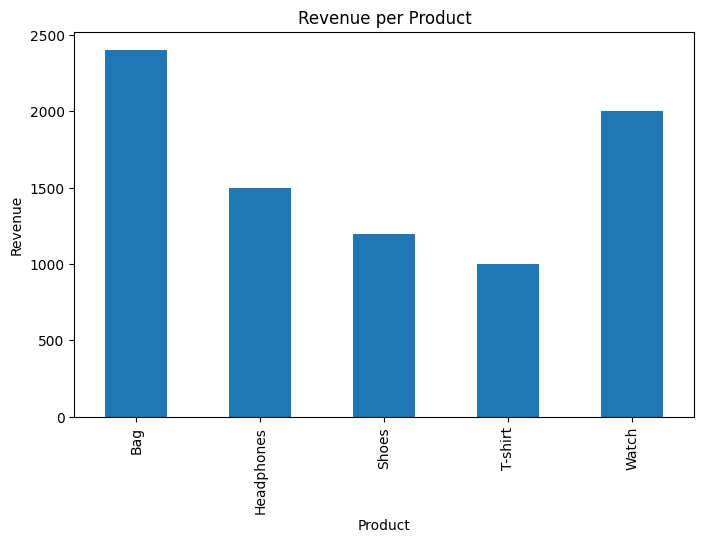

In [41]:
revenue_per_product = df.groupby("product")["revenue"].sum()

plt.figure(figsize=(8,5))
revenue_per_product.plot(kind="bar")
plt.title("Revenue per Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()


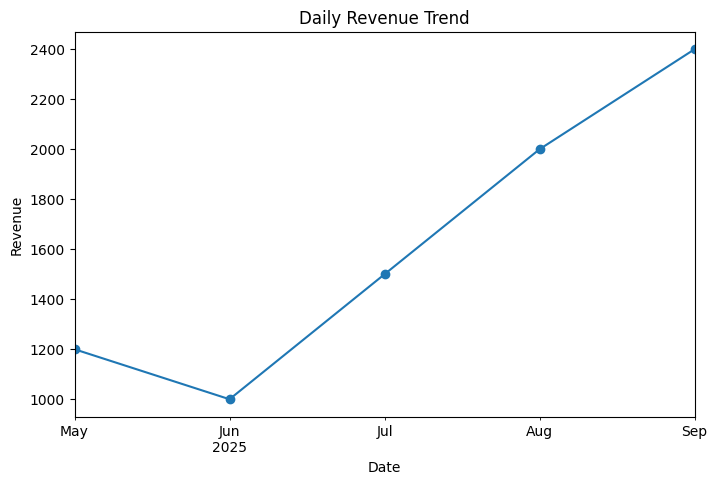

In [42]:
daily_revenue = df.groupby("date")["revenue"].sum()

plt.figure(figsize=(8,5))
daily_revenue.plot(kind="line", marker="o")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


In [ ]:
df.to_csv(r"D:\ecommerce-analytics\data\clean_orders.csv", index=False)
